# Hoja de Trabajo Regresión Lineal 

Marcos Gutierrez

In [16]:
# Modulos para analiss
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn  as sb
# Modulos realizados en clases
from gradient_descent import gradient_descent
from linear_cost import linear_cost
from linear_cost_derivate import linear_cost_derivate

### Abrimos el archivo CSV

In [17]:
#abrimos el csv y lo colocamos en un array
with open('Admission_Predict.csv', "r") as file:
    data = list(csv.reader(file, delimiter = ","))
    #le colocamos con numpy en un array
    data = np.array(data[1:], dtype=np.float)
    

In [18]:
#datos de GRE Score
GRES = data[:,1]

In [19]:
#datos de TFOEL Score
TFOEL = data[:,2]

In [20]:
#datos de Chance of Admit
Chance = data[:,8]

### Visualización de los datos Pandas

In [29]:
#Visualizacion de los datos, se usaran los datos GRE Score, TOEFL Score y Chance of Admit
dataset = pd.read_csv("Admission_Predict.csv")

In [30]:
#Describe de todos los datos 
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [31]:
#Eliminamos la columna Serial
dataset= dataset.drop(labels='Serial No.',axis=1)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Descripción de cada uno de los Datos que se encuentran en el archivo

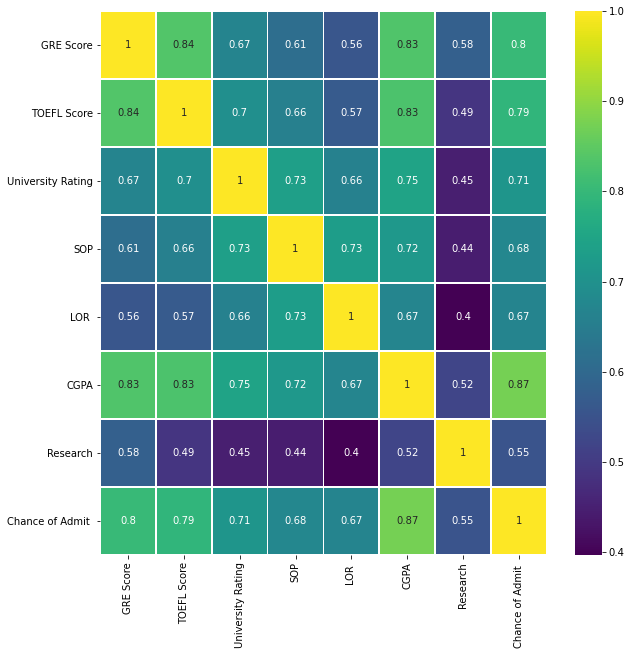

In [32]:
plt.figure(figsize=(10,10))
sb.heatmap(dataset.corr(),cmap='viridis',annot=True,linewidths=0.5,)

La posibilidad de admision esta más dada por las columnas de GRE Score, TOEFl Score y Chance Admit, por lo cual son los datos que se tendran para el analisis.

In [7]:
#Los datos de X, son la union entre los datoas de GRE Score y TOEFL Score
X = dataset.iloc[:len(dataset), 1].values
# Colocamos los limites de la matriz
X = X.reshape(-1, 1)
X = np.insert(X, 0, dataset.iloc[:len(dataset), 0].values, axis = 1)
# Header of array ["GRE Score", "TOEFL"]
X = np.insert(X, 0, 1, axis = 1)

In [8]:
#Los datos de y, son los de Chance of Admit
y = dataset.iloc[:len(dataset), 2].values.reshape(-1,1)

In [1]:
#Valores de X
X 

NameError: name 'X' is not defined

In [2]:
#Valores de y
y

NameError: name 'y' is not defined

In [11]:
X.shape[1]

3

In [12]:
# X.shape[1] de la matriz X 
theta_0 = np.random.rand((X.shape[1]), 1)

In [13]:
# Implementamos funciones
theta, costs, gradient_norms = gradient_descent(
    X, 
    y, 
    theta_0, 
    linear_cost, 
    linear_cost_derivate,
    lamda = 3,
    alpha = 0.000001,
    treshold = 0.001, 
    max_iter = 100000)

In [14]:
print ("Theta", theta[0])

Theta [0.35554942]


In [15]:
print ("cost", theta[1])

cost [-0.03326638]


In [16]:
print ("gradient_norms", theta[2])

gradient_norms [0.10153746]
